Ahmet Zafer SAĞLIK 150160519 

In [1]:
from scipy.io import wavfile
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.linalg import dft
import cv2

# Question 1

##  Image FFTs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


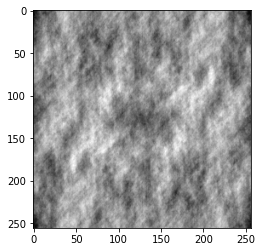

In [6]:
lena_imag = cv2.imread('lena_grayscale.jpg', cv2.IMREAD_GRAYSCALE)
fabric_imag = cv2.imread('fabric_grayscale.jpg', cv2.IMREAD_GRAYSCALE)

#• Using 2D-FFT, calculate 2D Fourier representations of these images
lena_imag_2df= np.fft.fft2(lena_imag)
fabric_imag_2df= np.fft.fft2(fabric_imag)
#Decompose these representations into its magnitudes and phases
phase_lena_imag = np.angle(np.exp(1j*lena_imag_2df))
magnitude_lena_imag = np.abs(lena_imag_2df)

phase_fabric_imag = np.angle(np.exp(1j*fabric_imag_2df))
magnitude_fabric_imag = np.abs(fabric_imag_2df)
# Obtain new images by using one image’s phase and other image’s magnitude information
combined_img = np.multiply(magnitude_lena_imag, phase_fabric_imag)
img_Combined = np.real(np.fft.ifft2(combined_img))
# min
lowest = np.nanmin(img_Combined[np.isfinite(img_Combined)])
# max
highest = np.nanmax(img_Combined[np.isfinite(img_Combined)])
# constract range(original)
constract_range = highest - lowest
# normalizing
norm_fft = (img_Combined - lowest) / constract_range * 255

plt.imshow(norm_fft, cmap='gray')





True

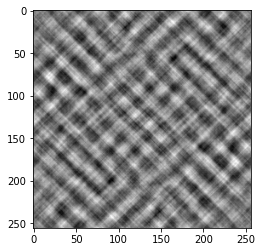

In [8]:


# Obtain new images by using one image’s phase and other image’s magnitude information
combined_img2 = np.multiply(magnitude_fabric_imag, phase_lena_imag)
img_Combined2 = np.real(np.fft.ifft2(combined_img2))
# min
lowest2 = np.nanmin(img_Combined2[np.isfinite(img_Combined2)])
# max
highest2 = np.nanmax(img_Combined2[np.isfinite(img_Combined2)])
# constract range(original)
constract_range2 = highest2 - lowest2
# normalizing
norm_fft2 = (img_Combined2 - lowest2) / constract_range2 * 255

plt.imshow(norm_fft, cmap='gray')

plt.imshow(norm_fft2, cmap='gray')

cv2.imwrite('new_image.jpg', norm_fft)

cv2.imwrite('new_image2.jpg', norm_fft2)

# Question 2

## Part 1- Plot the spectrogram

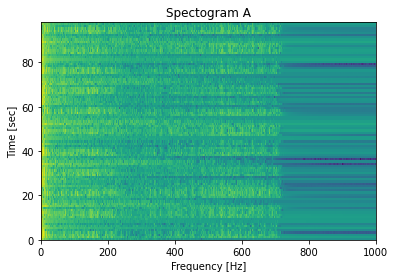

In [9]:
M = np.load('spectrogram.npy')
P = np.load('phases.npy')

plt.pcolormesh(M)
plt.title("Spectogram A")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Time [sec]')
plt.xscale('linear')

plt.show()

## Part 2: find Audio

In [12]:
reflex_m= np.fliplr(M) #flip array left right direction
reflex_m = reflex_m[:,:999] # take index 1 to 999
index_first = reflex_m[:,:1] 
index_first=index_first.T
reflex_m=reflex_m.T
reflex_m= np.concatenate((index_first,reflex_m)) 
magnitude_last= np.concatenate((M.T,reflex_m)) 
#Combining the first part of index of magnitude with its reverse 
#So we will get an array with same dimension as Phase(2000,98) array will be [0 to 999,999 to 1] 
                                                 
                                                

In [13]:
magni_lineer = 10**(magnitude_last/10)
magni_exp = np.multiply(magni_lineer,(np.exp(1j*P.T)))


In [14]:
matrix_df=dft(2000, scale=None) 
#dft table
dft_inv_matrix = np.linalg.inv(matrix_df)/2000 # DFT İNV*1/n
magni_exp = magni_exp.T
Z = np.zeros([magni_exp.shape[0],magni_exp.shape[1]])
for i in range(magni_exp.shape[0]):
    Z[i]= np.matmul(magni_exp[i],dft_inv_matrix) #dft multiplication with each row 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [16]:
Z_son = Z.flatten() ## To write as an audio, its shape reduced to one dimension (196.000)

scaled = np.int16(Z_son/np.max(np.abs(Z_son)) * 20000) #Converting to sound
wavfile.write('test3.wav', 44100, scaled)

## Part 3 : Use Hann windows with sizes

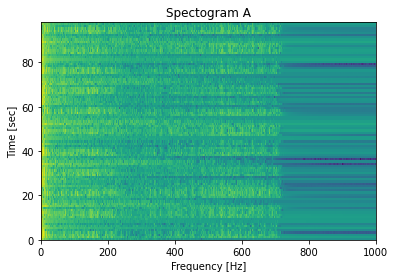

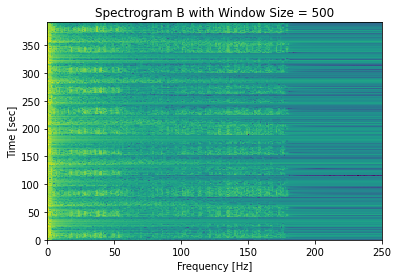

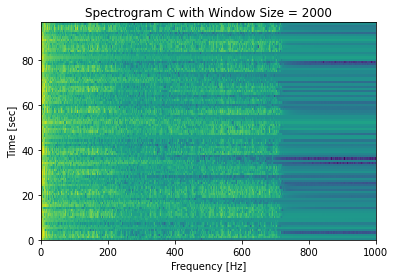

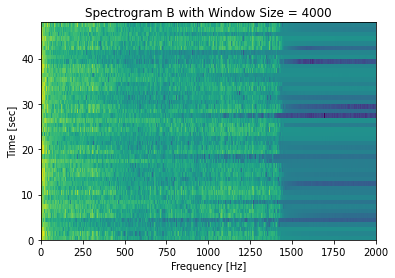

In [18]:
#Original Spectogram as A
plt.pcolormesh(M)
plt.title("Spectogram A")
plt.ylabel('Time [sec]')
plt.xlabel('Frequency [Hz]')
plt.xscale('linear')
plt.show()

fs,signal = wavfile.read("test3.wav")
signal = signal*1.0
signal1 = signal / np.max((signal))

#Spectogram as B (500)
spec_matrix = np.zeros(((signal1.shape[0]-500)//500,500//2))
for i in range ((signal1.shape[0]-500)//500):
    fft1 = np.abs(np.fft.fft(signal1[i*500:i*500+500]))
    fft = fft1[0:500//2]
    spec_matrix[i,:] = fft

spec_matrix2 = 10*np.log10(spec_matrix.transpose((1,0))+1e-5)

plt.pcolormesh(spec_matrix2.T)
ax = plt.gca()
ax.set_title('Spectrogram '+str('B')+' with Window Size = '+str(500))
ax.set_ylabel('Time [sec]')
ax.set_xlabel('Frequency [Hz]')    
ax.set_xscale('linear')

plt.show()


#Spectogram as C (2000)
spec_matrix = np.zeros(((signal1.shape[0]-2000)//2000,2000//2))
for i in range ((signal1.shape[0]-2000)//2000):
    fft1 = np.abs(np.fft.fft(signal1[i*2000:i*2000+2000]))
    fft = fft1[0:2000//2]
    spec_matrix[i,:] = fft

spec_matrix2 = 10*np.log10(spec_matrix.transpose((1,0))+1e-5)

plt.pcolormesh(spec_matrix2.T)
ax = plt.gca()
ax.set_title('Spectrogram '+str('C')+' with Window Size = '+str(2000))
ax.set_ylabel('Time [sec]')
ax.set_xlabel('Frequency [Hz]')    
ax.set_xscale('linear')

plt.show()


#Spectogram as D (4000)
spec_matrix = np.zeros(((signal1.shape[0]-4000)//4000,4000//2))
for i in range ((signal1.shape[0]-4000)//4000):
    fft1 = np.abs(np.fft.fft(signal1[i*4000:i*4000+4000]))
    fft = fft1[0:4000//2]
    spec_matrix[i,:] = fft

spec_matrix2 = 10*np.log10(spec_matrix.transpose((1,0))+1e-5)

plt.pcolormesh(spec_matrix2.T)
ax = plt.gca()
ax.set_title('Spectrogram '+str('B')+' with Window Size = '+str(4000))
ax.set_ylabel('Time [sec]')
ax.set_xlabel('Frequency [Hz]')    
ax.set_xscale('linear')

plt.show()




## Part 4 - Comparison

You can easily blue lines between greens.Since we got bigger slices in 4000 it has wider.500 has narrower.
Spectogram C is the most reasonable one.While we are doing spectrogram we have 2 important scales.One of them window size.The other one is time.When we are increasing Window size we are decreasing spectral leakage.Because the more you get bigger windows the more you get bigger slices.But at the same time is increasin as well.So should put an optimum value for both of them.C is the closest one for this theory.And more likely to original spectogram.


# Question 3

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


def signal_func(freq):
  
  Fs = 44100
  T = 1/Fs # sampling period
  t = 0.1 # sampling second
  N = Fs*t # total points 


  
  signal1 = (3*np.pi*t/4 + np.pi/2)*freq
  signal2 = (np.pi*t/4 + 3*np.pi/5)*freq

  t_vec = np.arange(N)*T # time vector 
  x = np.sin(signal1*t_vec)
  y = np.sin(signal2*t_vec)

  line_up, = plt.plot(t_vec,x)
  line_down, = plt.plot(t_vec,y)
  plt.legend([line_up,line_down],['x','y'])
  plt.title(r'Plot of frequency ' +str(freq)  );
  plt.show()

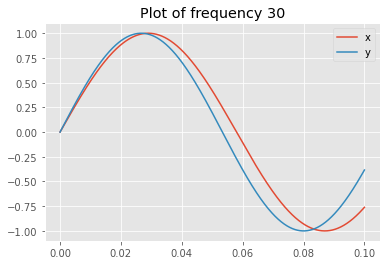

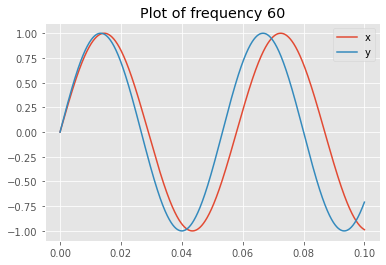

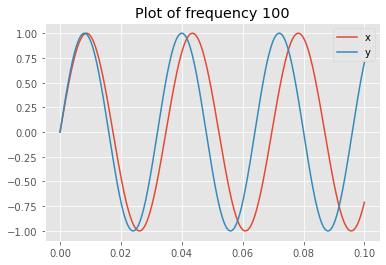

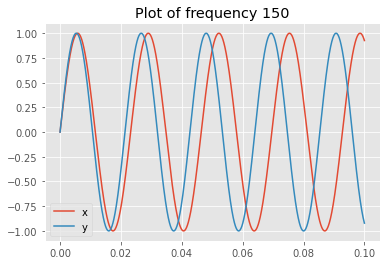

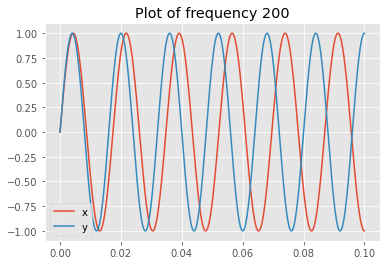

In [20]:
signal_func(30)
signal_func(60)
signal_func(100)
signal_func(150)
signal_func(200)

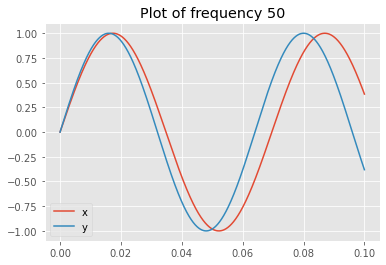

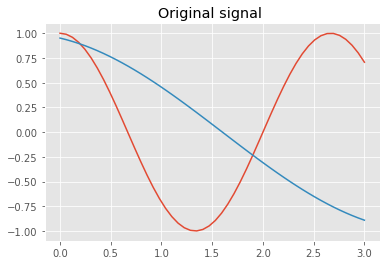

In [22]:
signal_func(50)

#original signal
t = np.linspace(0, 3, 50)

plt.plot(t,np.sin(3*np.pi*t/4 + np.pi/2))
plt.plot(t,np.sin(np.pi*t/4 + 3*np.pi/5))
plt.title(r'Original signal '   );
plt.show()

In [23]:
def convolution(freq):
 
  Fs = 44100
  T = 1/Fs # sampling period
  t = 0.1 # sampling time
  N = Fs*t # total points

  signal1 = (3*np.pi*t/4 + np.pi/2)*freq
  signal2 = (np.pi*t/4 + 3*np.pi/5)*freq

  #time vector
  t_vec = np.arange(N)*T 
  a = np.sin(signal1*t_vec)
  b = np.sin(signal2*t_vec)
  #convolution
  lengthA = a.shape[0]
  lengthB = b.shape[0]
  C = np.zeros(lengthA + lengthB -1)
  for m in range (lengthA):
      for n in range (lengthB):
          C[m+n] = C[m+n] + a[m]*b[n]
  return C

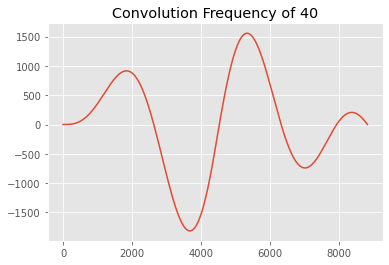

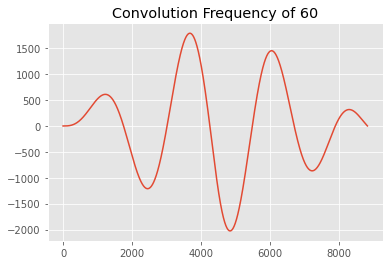

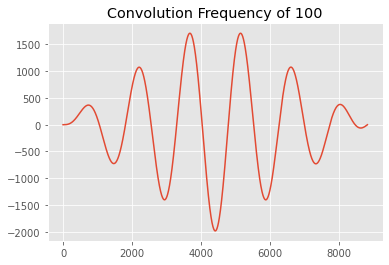

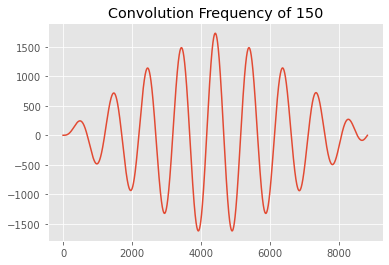

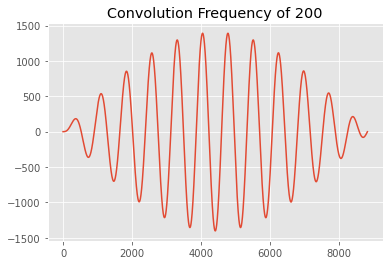

In [24]:
A = convolution(40)
plt.plot(A)
plt.title(r'Convolution Frequency of ' +str(40)  );
plt.show()
B = convolution(60)
plt.plot(B)
plt.title(r'Convolution Frequency of ' +str(60)  );
plt.show()
C = convolution(100)
plt.plot(C)
plt.title(r'Convolution Frequency of ' +str(100)  );
plt.show()
D = convolution(150)
plt.plot(D)
plt.title(r'Convolution Frequency of ' +str(150)  );
plt.show()
E = convolution(200)
plt.plot(E)
plt.title(r'Convolution Frequency of ' +str(200)  );
plt.show()

# Question 4

## Part 1

In [26]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft,fft2
import numpy as np
import matplotlib
import moviepy.editor as mpe
from math import floor

matplotlib.use("Agg")

ilber_fs , ilber = wav.read('ilber_ortaylı.wav')
esg_fs , esg = wav.read('esg.wav')

ilber = ilber*1.0
esg = esg*1.0
ilber_channel = ilber[:,0]
esg_channel =  esg[:,0]


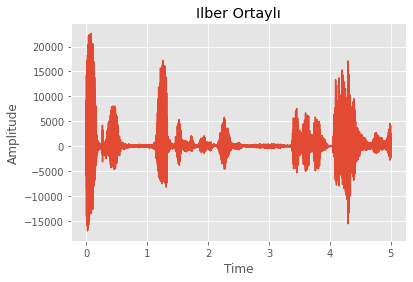

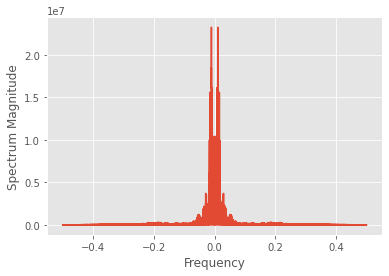

In [27]:
plt.plot(np.arange(0,ilber_channel.shape[0])/ilber_fs,ilber_channel)
plt.xlabel('Time')
plt.ylabel ('Amplitude')
plt.title('Ilber Ortaylı')
plt.show()
ilber_channel_fft = np.fft.fft(ilber_channel)
freq_ilber_channel = np.fft.fftfreq(len(ilber_channel))
fig, ax = plt.subplots()
ax.plot(freq_ilber_channel,abs(ilber_channel_fft))
ax.set_xlabel('Frequency')
ax.set_ylabel('Spectrum Magnitude')
plt.show()

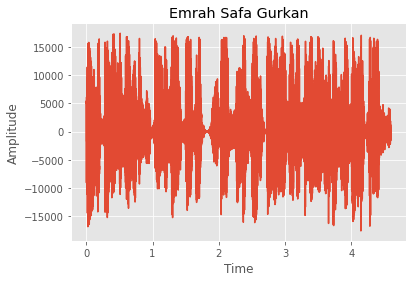

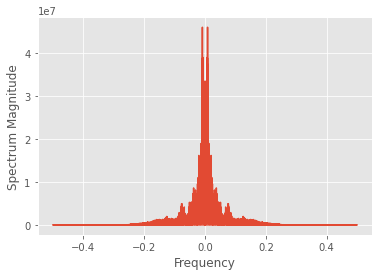

In [28]:
plt.plot(np.arange(0,esg_channel.shape[0])/esg_fs,esg_channel)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Emrah Safa Gurkan')
plt.show()

esg_channel_fft = np.fft.fft(esg_channel)
freq_esg_channel = np.fft.fftfreq(len(esg_channel))
fig, ax = plt.subplots()

ax.plot(freq_esg_channel,abs(esg_channel_fft))
ax.set_xlabel('Frequency')
ax.set_ylabel('Spectrum Magnitude')
plt.show()

## Part 2

In [29]:
from scipy.signal import freqz
from scipy.signal import butter, lfilter
#from the pdf example code
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

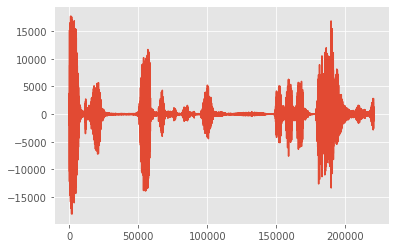

In [30]:
# Differnt cutoff frequencies.
lowcut_a = 250.0
highcut_a= 8000.0
a = butter_bandpass_filter(ilber_channel, lowcut_a, highcut_a, ilber_fs, order=5)
plt.plot(a)
plt.show()

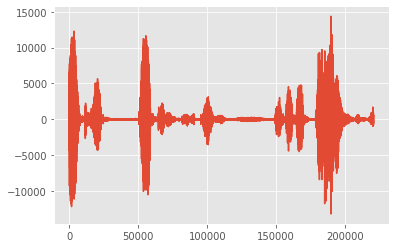

In [31]:
lowcut_c = 500.0
highcut_c= 12000.0
c = butter_bandpass_filter(ilber_channel, lowcut_c, highcut_c, ilber_fs, order=5)
plt.plot(c)
plt.show()

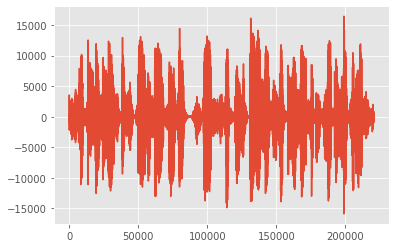

In [32]:
lowcut_b=500.0
highcut_b=8000.0
b = butter_bandpass_filter(esg_channel, lowcut_b, highcut_b, esg_fs, order=5)
plt.plot(b)
plt.show()

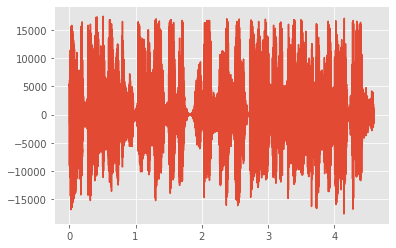

In [33]:
plt.plot(np.arange(0,esg_channel.shape[0])/esg_fs,esg_channel)
plt.show()

##Why bandlimit 
Please briefly explain why signals should be bandlimited before the modulation process

Because if you dont bandlimit it will overlap